<a href="https://colab.research.google.com/github/Gobihanath/ML-energy-consumption-prediction-carbon-emission-forecasting/blob/main/Code/Renewable_Energy_Historical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
### import dependencies and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'19APC3970_DBMS_Class Assignment 1.zip'
 19APC3970-English.pdf
 19APC3970_FWT_QUIZ02.pdf
'19APC3970 HTML-01 (1).zip'
'19APC3970 HTML-01.zip'
'19APC3970 HTML _1.rar'
 19APC3970.LOG2.docx
 19APC3970.LOG.docx
 19APC3970_QUIZ02.pdf
 19APC3970-Quiz03.pdf
 20240216_091107.jpg
 20240216_091245.jpg
 20240216_091320.jpg
 20240216_095746.jpg
 20240216_170935.jpg
 Abstract
 Abstract.gdoc
 Attendence1.jpg
'Author Declaration Form IRCFoT-2025_V2.docx'
'Balancing Academic and Non-Academic Workload: Stress Assessment .gform'
'Balancing Academic and Non-Academic Workload: Stress Assessment  (Responses).gsheet'
 Banana1.jpg
 Banana2.jpg
 BI-Report.gdoc
'CamScanner 08-26-2022 13.34.jpg'
'CamScanner 11-05-2021 11.58_1.pdf'
'CamScanner 11-05-2021 11.58.pdf'
'Capstone Project - Group 22'
 CIS
 Classroom
'Colab Notebooks'
 Dataset
'Doc1 { Easy come Easy go friend }.gdoc'
 Dtect_model1.h5
'Extended Abstract_v2.docx'
'Faculty details.xlsx'
 FeedBack.gform
'FeedBack (Responses).gshee

In [2]:
%cd /mydrive/Dataset/

/content/gdrive/My Drive/Dataset


In [6]:
import pandas as pd
df_h = pd.read_csv("renewable_energy_historical.csv")

In [5]:
df_h

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088
...,...,...,...,...
5598,World,OWID_WRL,2017,11.355979
5599,World,OWID_WRL,2018,11.741059
5600,World,OWID_WRL,2019,12.237987
5601,World,OWID_WRL,2020,13.455194


In [7]:
distinct_entities = df_h['Entity'].unique()

# Display the distinct entity names
print(distinct_entities)

['Africa' 'Africa (BP)' 'Algeria' 'Argentina' 'Asia' 'Asia Pacific (BP)'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'CIS (BP)' 'Canada' 'Central America (BP)' 'Chile'
 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Eastern Africa (BP)' 'Ecuador' 'Egypt' 'Estonia' 'Europe' 'Europe (BP)'
 'European Union (27)' 'Finland' 'France' 'Germany' 'Greece'
 'High-income countries' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lithuania' 'Lower-middle-income countries'
 'Luxembourg' 'Malaysia' 'Mexico' 'Middle Africa (BP)' 'Middle East (BP)'
 'Morocco' 'Netherlands' 'New Zealand' 'Non-OECD (BP)' 'North America'
 'North America (BP)' 'North Macedonia' 'Norway' 'OECD (BP)' 'Oceania'
 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South America' 'Sou

In [8]:
df_sl = df_h[df_h["Entity"]=='Sri Lanka']
df_sl

,Entity,Code,Year,Renewables (% equivalent primary energy)
4618,Sri Lanka,LKA,1965,10.324470
4619,Sri Lanka,LKA,1966,10.943520
4620,Sri Lanka,LKA,1967,10.974932
4621,Sri Lanka,LKA,1968,12.205965
4622,Sri Lanka,LKA,1969,13.611147
4623,Sri Lanka,LKA,1970,11.076228
4624,Sri Lanka,LKA,1971,12.125497
4625,Sri Lanka,LKA,1972,11.862130
4626,Sri Lanka,LKA,1973,9.413183
4627,Sri Lanka,LKA,1974,15.722433


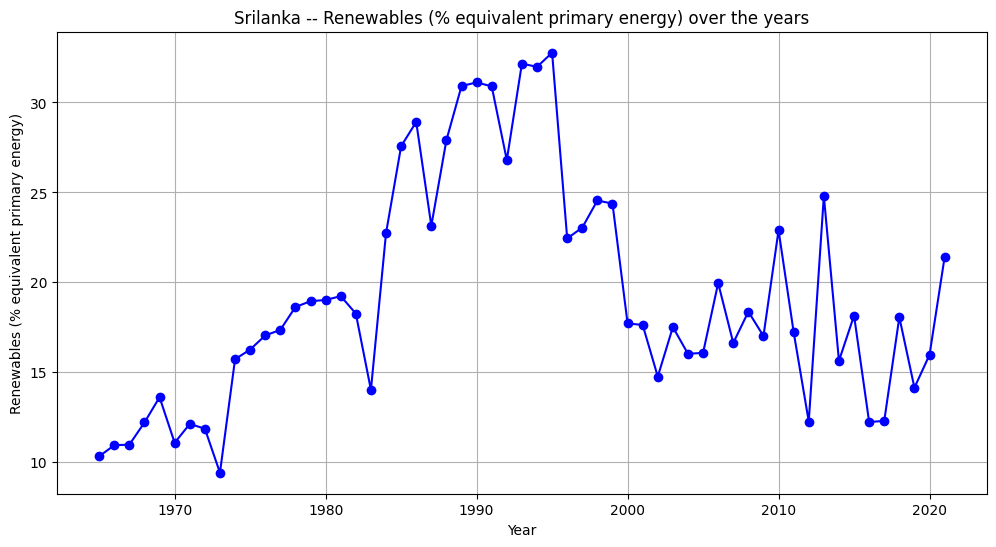

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_sl['Year'], df_sl['Renewables (% equivalent primary energy)'], color='b', marker='o')
plt.title('Srilanka -- Renewables (% equivalent primary energy) over the years')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.grid(True)
plt.show()

## SAARC Countries

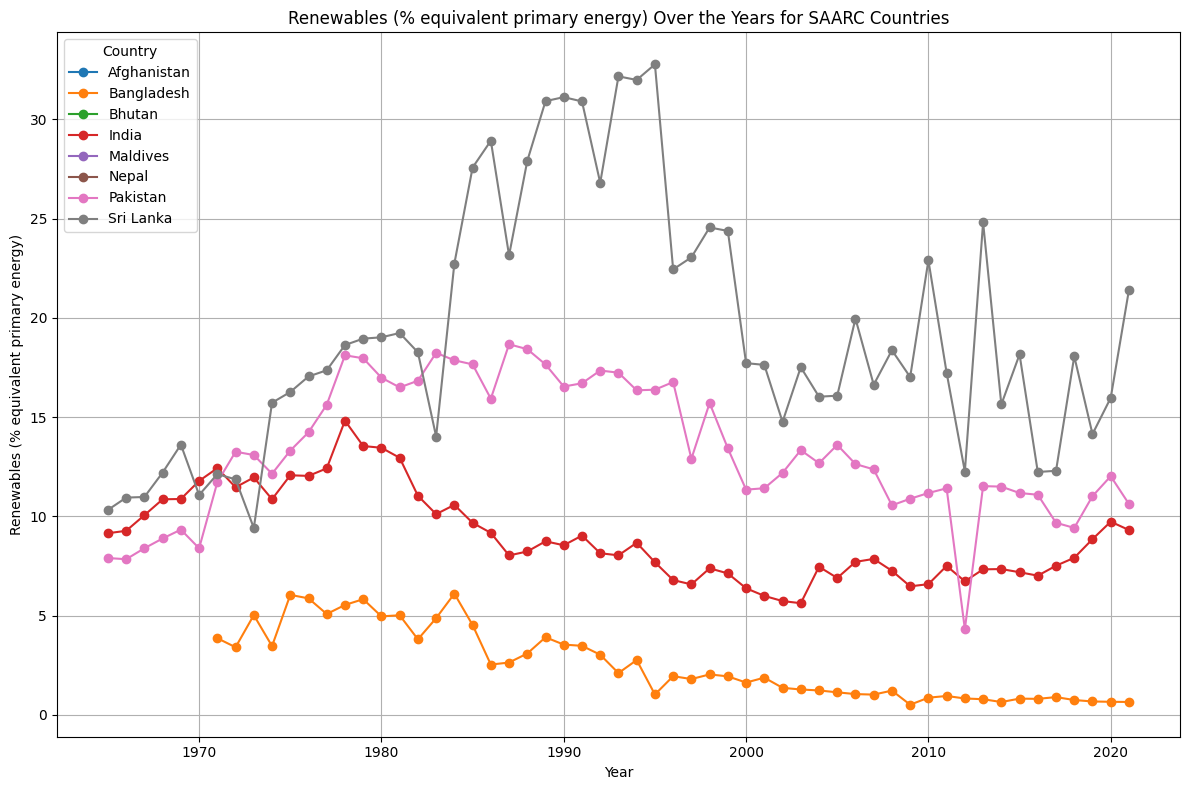

In [12]:
# List of SAARC countries
saarc_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

# Filter the DataFrame for the SAARC countries
df_saarc = df_h[df_h['Entity'].isin(saarc_countries)]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each country and plot the data
for country in saarc_countries:
    country_data = df_saarc[df_saarc['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'], marker='o', label=country)

# Title and labels
plt.title('Renewables (% equivalent primary energy) Over the Years for SAARC Countries')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


# Srilanka Forecasting

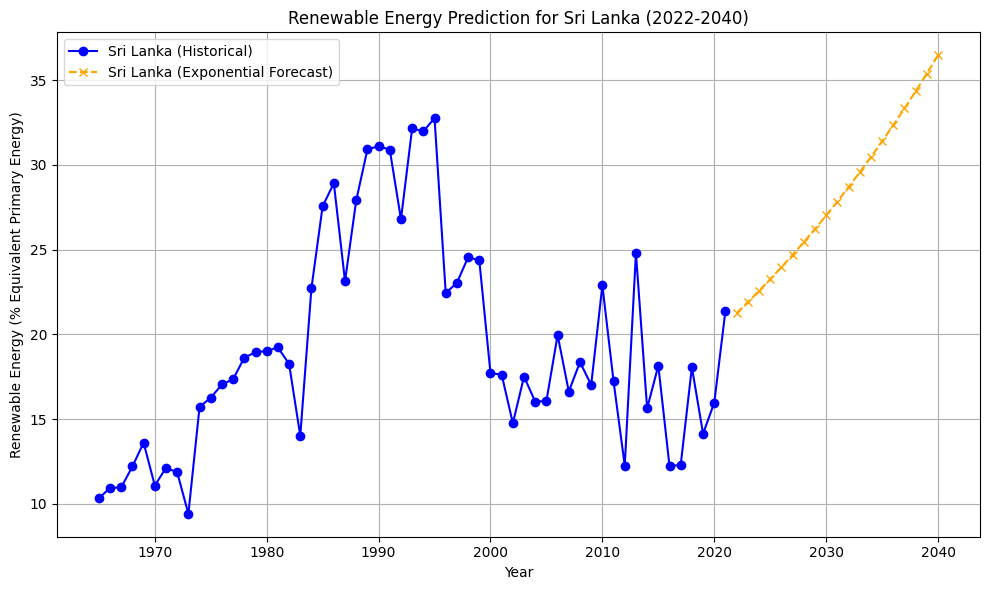

Model Error for Sri Lanka:
Mean Squared Error (MSE): 18.355506272073658
Mean Absolute Error (MAE): 3.5939962038792563
R-squared (R²): 0.5379573694360567


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Extract features and target
X = df_sl['Year'].values.reshape(-1, 1)
y = df_sl['Renewables (% equivalent primary energy)'].values

# Apply polynomial transformation
degree = 3  # You can change the degree based on the data's complexity
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict on the historical data
y_pred = model.predict(X_poly)

# Forecast future values
last_year = X[-1][0]

# Filter the data between 1983 and 1998
mask = (df_sl['Year'] >= 1982) & (df_sl['Year'] <= 2020)
average_value = np.mean(df_sl.loc[mask, 'Renewables (% equivalent primary energy)'])

# Forecast future values using an exponential growth model
delta = 0.03  # Delta value for exponential growth
future_years = np.arange(last_year + 1, 2041)
years_since_start = future_years - future_years[0]
future_predictions = average_value * np.exp(delta * years_since_start)

# Error metrics for historical data prediction
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting the historical data and exponential forecast
plt.figure(figsize=(10, 6))
plt.plot(df_sl['Year'], y, marker='o', color='blue', label='Sri Lanka (Historical)')
plt.plot(future_years, future_predictions, linestyle='--', color='orange', marker='x', label='Sri Lanka (Exponential Forecast)')

plt.xlabel('Year')
plt.ylabel('Renewable Energy (% Equivalent Primary Energy)')
plt.title('Renewable Energy Prediction for Sri Lanka (2022-2040)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Print model evaluation metrics
print(f"Model Error for Sri Lanka:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
